In [20]:
import numpy as np
import qiskit.quantum_info
from qiskit.execute_function import execute
from qiskit import *
import qiskit
from qiskit.visualization import plot_histogram
backend = BasicAer.get_backend('statevector_simulator')


from SYMQCircuit import *

# Testing 1 qubit gates:

In [21]:
nr = 1
size = 2


test = QuantumCircuit(size)
test.x(nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_x(nr)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [22]:
test = QuantumCircuit(size)
test.y(nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_y(nr)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [23]:
test = QuantumCircuit(size)
test.z(nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_z(nr)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [24]:
test = QuantumCircuit(size)
test.h(nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_h(nr)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [25]:
test = QuantumCircuit(size)
test.rx(1/3,nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_rx(nr,1/3)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [26]:
test = QuantumCircuit(size)
test.ry(1/3,nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_ry(nr,1/3)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [27]:
test = QuantumCircuit(size)
test.rz(1/3,nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_rz(nr,1/3)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


In [28]:
test = QuantumCircuit(size)
test.rz(1/3,nr)
test.ry(2/3,nr)
test.ry(4/3,nr)
test.x(nr)
test.h(nr)
test.rx(2/7,nr)
b = qiskit.quantum_info.Operator(test).data

test2 = SYMQCircuit(size)
test2.add_rz(nr,1/3)
test2.add_ry(nr,2/3)
test2.add_ry(nr,4/3)
test2.add_x(nr)
test2.add_h(nr)
test2.add_rx(nr,2/7)
a = test2.get_circuit_unitary()
print(np.allclose(a,b))

True


# Testing 2 qubit gates:


#### CNOT:

In [29]:
nr = 1
size = 2

test = QuantumCircuit(size)
test.cnot(control_qubit=0,target_qubit=1)
qiskit_cnot = qiskit.quantum_info.Operator(test).data.real.astype(int)

test2 = SYMQCircuit(size)
test2.add_cnot(control_qubit=0,target_qubit=1)
my_cnot = test2.get_circuit_unitary().real.astype(int)

print(np.allclose(my_cnot,qiskit_cnot))

True


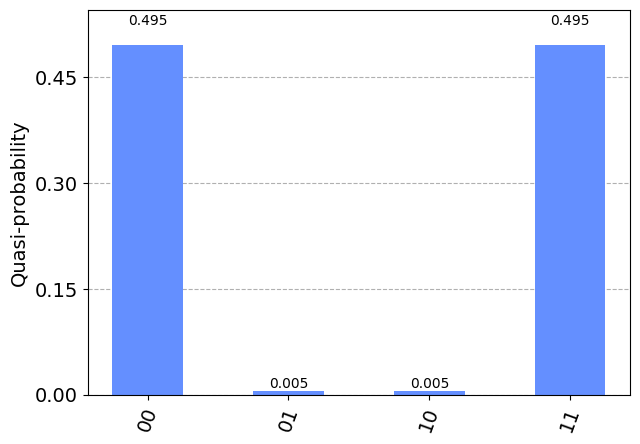

In [30]:
size = 2

test = QuantumCircuit(size)
test.h(0)
test.rx(theta=4/21,qubit=1)
test.cnot(control_qubit=0,target_qubit=1)

test2 = SYMQCircuit(size)
test2.add_h(0)
test2.add_rx(angle=4/21,target_qubit=1)
test2.add_cnot(control_qubit=0,target_qubit=1)

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

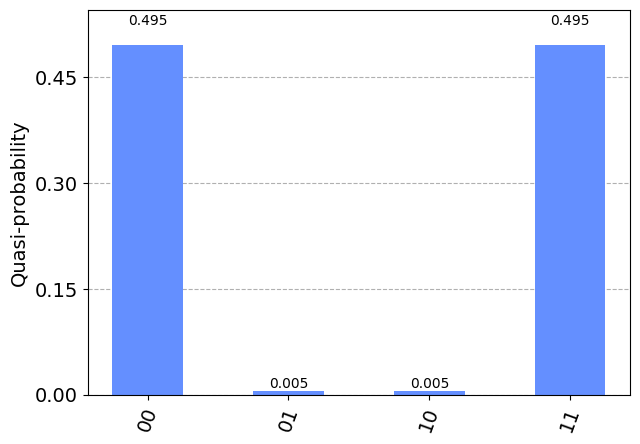

In [31]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = get_state_probabilities(state_vector_=statevec)
reversed_states = {}
plot_histogram(probs)

#### SWAP:

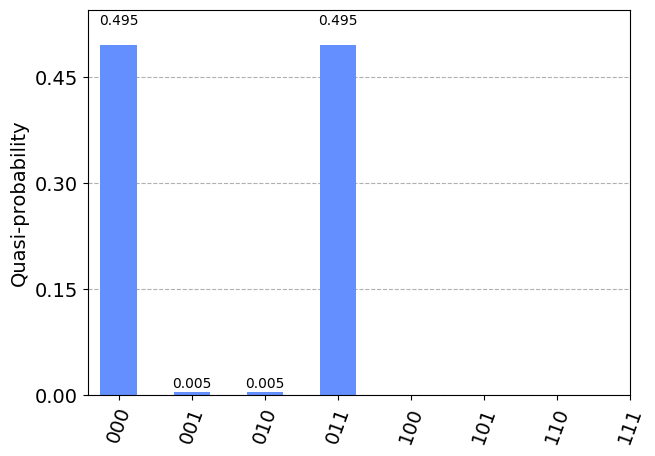

In [32]:
size = 3
test = QuantumCircuit(size)
test.h(0)
test.rx(theta=4/21,qubit=1)
test.swap(qubit1=0,qubit2=1)

test2 = SYMQCircuit(size)
test2.add_h(0)
test2.add_rx(angle=4/21,target_qubit=1)
test2.add_swap(qubit_1=0,qubit_2=1)

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

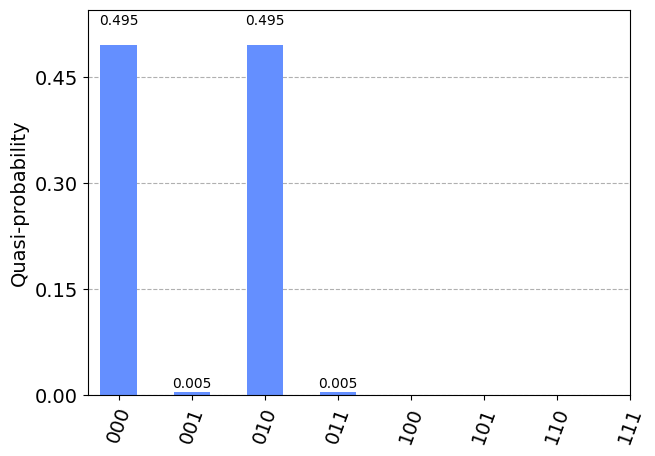

In [33]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = get_state_probabilities(state_vector_=statevec)
plot_histogram(probs)

#### RZZ:

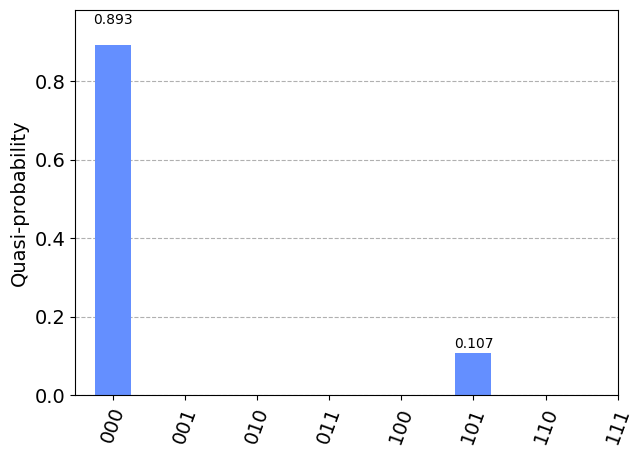

In [34]:
size = 3
nr = 2
test = QuantumCircuit(size)
test.rz(1/3,nr)
test.ry(2/3,nr)
test.rzz(theta=np.pi/3,qubit1=0,qubit2=nr)


test2 = SYMQCircuit(size)
test2.add_rz(nr,1/3)
test2.add_ry(nr,2/3)
test2.add_rzz(qubit_1=0,qubit_2=nr, angle=np.pi/3)


probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

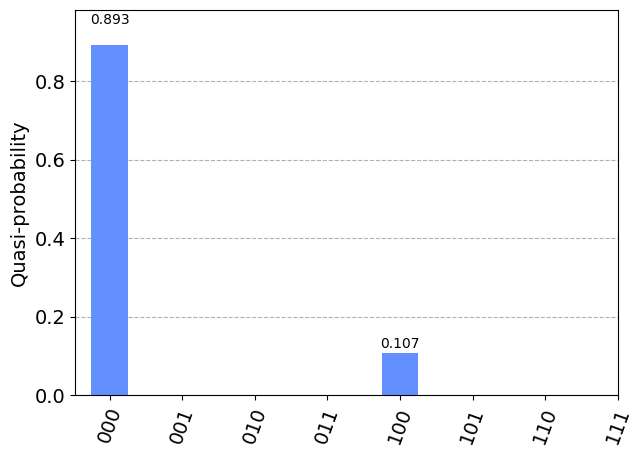

In [35]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = get_state_probabilities(state_vector_=statevec)
plot_histogram(probs)

#### RXX:

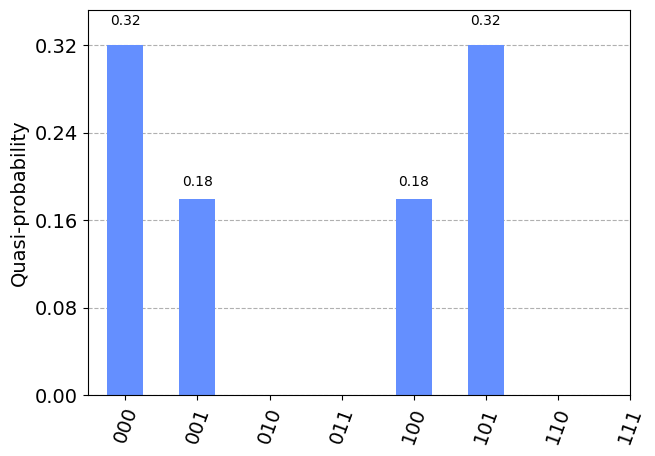

In [36]:
size = 3
test = QuantumCircuit(size)
test.rz(1/3,nr)
test.ry(2/3,nr)
test.ryy(theta=np.pi/3,qubit1=0,qubit2=nr)
test.ry(4/3,nr)
test.cnot(target_qubit=0,control_qubit=1)
test.x(nr)
test.h(nr)
test.rx(2/7,nr)

test2 = SYMQCircuit(size)
test2.add_rz(nr,1/3)
test2.add_ry(nr,2/3)
test2.add_ryy(qubit_1=0,qubit_2=nr, angle=np.pi/3)
test2.add_ry(nr,4/3)
test2.add_cnot(target_qubit=0,control_qubit=1)
test2.add_x(nr)
test2.add_h(nr)
test2.add_rx(nr,2/7)

probabilities = test2.get_state_probabilities()
plot_histogram(probabilities)

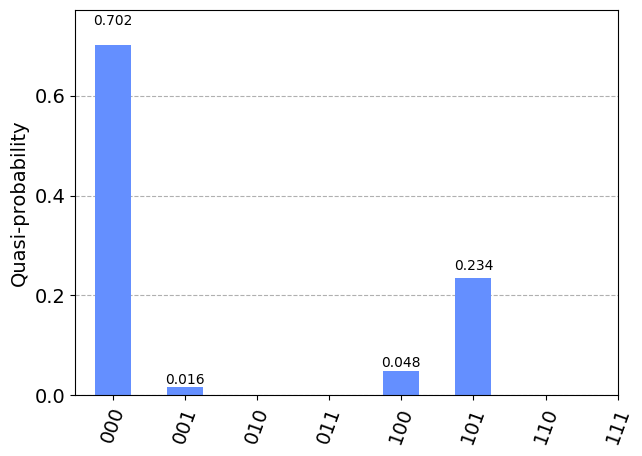

In [37]:
job = execute(test, backend)
statevec = job.result().get_statevector()
probs = get_state_probabilities(state_vector_=statevec)
plot_histogram(probs)

In [38]:
idx = 2
tester = "abcd"
tester[-(idx+1)]

'b'